<a href="https://colab.research.google.com/github/ankitrai777/EDA-on-Play-Store-App-Review/blob/main/Play_Store_App_Review_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

We got an interesting task to analyse the play store apps data and discover the key factors responsible for the app engagement and its success. So, let's start with importing of important libraries which will be useful in data analyzation and visualization.

In [ ]:
#Importing important libraries for EDA
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Now that all important libraries are loaded, let's mount our google drive where the two play store datasets are located.

In [ ]:
# Mounting drive with colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Alright ! Drive is mounted and let's load our two datasets.

In [ ]:
#Importing playstore data from drive
ps_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Capstone Project : EDA on Play Store App Reviews/Play Store Data.csv')

#Importing User Reviews from drive
ur_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Capstone Project : EDA on Play Store App Reviews/User Reviews.csv')

Now that we have imported our two data sets lets explore bith a bit

# **Data Exploration**

1) Data Exploration of Our first Data set i.e Play Store Data.

In [ ]:
#Checking first 5 rows of our first data set i.e playstore data set
ps_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


The data looks interesting ! Let's see bottom five rows of our data.

In [ ]:
#Checking last 5 rows of our first data set i.e playstore data set
ps_df.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


Okay! let's check out the information of our raw data.

In [ ]:
# Display the summary of our first dataset
ps_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [ ]:
# And What is the shape of our first data set !!
ps_df.shape

(10841, 13)

In [ ]:
# Let's check what columns we will be dealing with
ps_df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

2) Data Exploration of our second data set with name User Reviews (ur_df)

In [ ]:
# Checking out first 5 rows of user reviews dataset.
ur_df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [ ]:
# Checking bottom 5 rows of user reviews dataset
ur_df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [ ]:
# Looking at the important information of our user review dataset
ur_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [ ]:
# Shape of dataset
ur_df.shape

(64295, 5)

In [ ]:
# Check all columns name in dataset
ur_df.columns

Index(['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
       'Sentiment_Subjectivity'],
      dtype='object')

Exploration part is done !! On going through the information we have found that there are some columns which need to be converted in the appropriate data type for the analization. For e.g size column, price column,insralls column and some other need to be converted in integer or float type. Also, there are null values in some columns which need to be rid off. So without further ado let's start data cleaning and get it ready for the analysation part.

First for simplicity, lets FIRST perform eda on our data sets seperately and then will see the relation between both dataset.

# **Data Cleaning**

In [ ]:
# Checking null values
ps_df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

## **Checking for Duplicates**

In [ ]:
# Checking for duplicate values
check_dupl = ps_df.duplicated(keep = False).any()
print(check_dupl)

True


In [ ]:
# Checking again for the duplictes
ps_df.App.nunique() , ps_df.App.shape

(9660, (10841,))

In [ ]:
# Displaying duplicte values
ps_df[ps_df.duplicated(keep = False ) == True].sort_values(by = 'App').head(6)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1393,10 Best Foods for You,HEALTH_AND_FITNESS,4.0,2490,3.8M,"500,000+",Free,0,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up
1407,10 Best Foods for You,HEALTH_AND_FITNESS,4.0,2490,3.8M,"500,000+",Free,0,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up
2543,1800 Contacts - Lens Store,MEDICAL,4.7,23160,26M,"1,000,000+",Free,0,Everyone,Medical,"July 27, 2018",7.4.1,5.0 and up
2322,1800 Contacts - Lens Store,MEDICAL,4.7,23160,26M,"1,000,000+",Free,0,Everyone,Medical,"July 27, 2018",7.4.1,5.0 and up
2256,2017 EMRA Antibiotic Guide,MEDICAL,4.4,12,3.8M,"1,000+",Paid,$16.99,Everyone,Medical,"January 27, 2017",1.0.5,4.0.3 and up
2385,2017 EMRA Antibiotic Guide,MEDICAL,4.4,12,3.8M,"1,000+",Paid,$16.99,Everyone,Medical,"January 27, 2017",1.0.5,4.0.3 and up


In [ ]:
ps_df[ps_df.duplicated(keep = 'first' ) == True].sort_values(by=['App']).head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1407,10 Best Foods for You,HEALTH_AND_FITNESS,4.0,2490,3.8M,"500,000+",Free,0,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up
2543,1800 Contacts - Lens Store,MEDICAL,4.7,23160,26M,"1,000,000+",Free,0,Everyone,Medical,"July 27, 2018",7.4.1,5.0 and up
2385,2017 EMRA Antibiotic Guide,MEDICAL,4.4,12,3.8M,"1,000+",Paid,$16.99,Everyone,Medical,"January 27, 2017",1.0.5,4.0.3 and up
1434,21-Day Meditation Experience,HEALTH_AND_FITNESS,4.4,11506,15M,"100,000+",Free,0,Everyone,Health & Fitness,"August 2, 2018",3.0.0,4.1 and up
7035,420 BZ Budeze Delivery,MEDICAL,5.0,2,11M,100+,Free,0,Mature 17+,Medical,"June 6, 2018",1.0.1,4.1 and up


In [ ]:
dub_indexes = ps_df.index[ps_df.duplicated(keep = 'first' ) == True]

In [ ]:
len(dub_indexes)

483

In [ ]:
ps_df = ps_df.drop(dub_indexes)

In [ ]:
ps_df.shape

(10358, 13)

In [ ]:
ps_df.nunique()

App               9660
Category            34
Rating              40
Reviews           6002
Size               462
Installs            22
Type                 3
Price               93
Content Rating       6
Genres             120
Last Updated      1378
Current Ver       2832
Android Ver         33
dtype: int64

## **Now that all duplicate values have been removed, we can proceed for further data cleaning by each column.**

## **1) APP Column**

In [ ]:
# Checking for duplicates in the APP Column

ps_df[ps_df.duplicated(['App','Category'] , keep = 'first' )].sort_values(by= 'App').head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
5415,365Scores - Live Scores,SPORTS,4.6,666246,25M,"10,000,000+",Free,0,Everyone,Sports,"July 29, 2018",5.5.9,4.1 and up
1970,8 Ball Pool,GAME,4.5,14201604,52M,"100,000,000+",Free,0,Everyone,Sports,"July 31, 2018",4.0.0,4.0.3 and up
1755,8 Ball Pool,GAME,4.5,14200344,52M,"100,000,000+",Free,0,Everyone,Sports,"July 31, 2018",4.0.0,4.0.3 and up
1844,8 Ball Pool,GAME,4.5,14200550,52M,"100,000,000+",Free,0,Everyone,Sports,"July 31, 2018",4.0.0,4.0.3 and up
1871,8 Ball Pool,GAME,4.5,14201891,52M,"100,000,000+",Free,0,Everyone,Sports,"July 31, 2018",4.0.0,4.0.3 and up


In [ ]:
# Droping duplicate App from the App column

dub_app_indexes = ps_df.index[ps_df.duplicated(['App','Category'], keep = 'first' )== True]
ps_df = ps_df.drop(dub_app_indexes)

In [ ]:
#Checking if duplicate values (by App and Category) are dropped from App Column

ps_df['App'].shape

(9745,)

In [ ]:
ps_df[ps_df.duplicated(['App','Category'] , keep = 'first' )].sort_values(by= 'App').head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


## **2) CATEGORY Column**

In [ ]:
# Check for dtype and null values

ps_df.Category.isnull().sum() , ps_df.Category.dtype

(0, dtype('O'))

## **3) RATING Column**

In [ ]:
#Checking null values in Rating column
ps_df['Rating'].isnull().sum()


1464

In [ ]:
# Checking Outlier
ps_df[(ps_df['Rating']> 5)|(ps_df['Rating'] <= 0)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [ ]:
ps_df.drop([10472],inplace = True)

In [ ]:
ps_df['Rating'] = ps_df['Rating'].fillna(ps_df.groupby('Category')['Rating'].transform('median'))

In [ ]:
ps_df['Rating'].isnull().sum()

0


## **5) REVIEWS Column**

In [ ]:
#Checking dtype of Rveiew Column
ps_df['Reviews'].dtype

dtype('O')

In [ ]:
# Check null values in Review Column
ps_df['Reviews'].isnull().sum()

0

In [ ]:
ps_df['Reviews'] = ps_df['Reviews'].astype(int)

In [ ]:
ps_df['Reviews'].dtypes

dtype('int64')

## **6) SIZE Column**

In [ ]:
ps_df['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [ ]:
# Checking for dtype of Size Column
ps_df['Size'].dtype

dtype('O')

In [ ]:
# Changing Object dtype to float
def appropriating_size(x):
  if x == 'Varies with device':
    y= np.nan
  elif 'M' in x:
    m1= x.replace('M','')
    m2= float(m1)
    y= m2 * 1000
  elif 'k' in x :
    k1= x.replace('k','')
    y=float(k1)
  return (y)

In [ ]:
#Converting size in kb
ps_df['Size']=ps_df['Size'].apply(lambda a: appropriating_size(a))

In [ ]:
#Checking if dtype is changed
ps_df['Size'].head()

0    19000.0
1    14000.0
2     8700.0
3    25000.0
4     2800.0
Name: Size, dtype: float64

In [ ]:
#Checking for null values
ps_df.Size.isnull().sum()

1250

In [ ]:
#Replacing null values with median
ps_df['Size'] = ps_df['Size'].fillna(ps_df.groupby('Category')['Size'].transform('median'))

In [ ]:
#Checking if null values removed
ps_df.Size.isnull().sum()

0

## **6) INSTALLS Column**

In [ ]:
# Checking dtype and null values
ps_df['Installs'].dtype , ps_df['Installs'].isnull().sum()

(dtype('O'), 0)

In [ ]:
#Checking unique values
ps_df['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [ ]:
#Changing values to int
def appropriating_installs(a):
  a1 = a.replace('+','')
  a2= a1.replace(',','')
  a3= int(a2)
  return a3

In [ ]:
ps_df['Installs'] =ps_df['Installs'].apply(lambda x : appropriating_installs(x))

In [ ]:
ps_df['Installs'].dtypes

dtype('int64')

## **7) TYPE Column**

In [ ]:
# Checking for dtype and null values of TYPE Column

ps_df['Type'].dtype  , ps_df['Type'].isnull().sum()

(dtype('O'), 1)

In [ ]:
ps_df['Type'].unique()

array(['Free', 'Paid', nan], dtype=object)

In [ ]:
ps_df['Type']= ps_df['Type'].fillna(ps_df['Type'].mode()[0])

In [ ]:
ps_df['Type'].unique()

array(['Free', 'Paid'], dtype=object)

## **8) PRICE Column**

In [ ]:
# Checking dtype and null values in Price Column

ps_df['Price'].dtype  , ps_df[ 'Type'].isnull().sum()

(dtype('O'), 0)

In [ ]:
ps_df['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [ ]:
def appropriating_price(b):
  b1 = b.replace('$','')
  b2 = float(b1)
  return b2

In [ ]:
ps_df['Price']=ps_df['Price'].apply(lambda x : appropriating_price(x))

In [ ]:
ps_df['Price'].unique()

array([  0.  ,   4.99,   3.99,   6.99,   1.49,   2.99,   7.99,   5.99,
         3.49,   1.99,   9.99,   7.49,   0.99,   9.  ,   5.49,  10.  ,
        24.99,  11.99,  79.99,  16.99,  14.99,   1.  ,  29.99,  12.99,
         2.49,  10.99,   1.5 ,  19.99,  15.99,  33.99,  74.99,  39.99,
         3.95,   4.49,   1.7 ,   8.99,   2.  ,   3.88,  25.99, 399.99,
        17.99, 400.  ,   3.02,   1.76,   4.84,   4.77,   1.61,   2.5 ,
         1.59,   6.49,   1.29,   5.  ,  13.99, 299.99, 379.99,  37.99,
        18.99, 389.99,  19.9 ,   8.49,   1.75,  14.  ,   4.85,  46.99,
       109.99, 154.99,   3.08,   2.59,   4.8 ,   1.96,  19.4 ,   3.9 ,
         4.59,  15.46,   3.04,   4.29,   2.6 ,   3.28,   4.6 ,  28.99,
         2.95,   2.9 ,   1.97, 200.  ,  89.99,   2.56,  30.99,   3.61,
       394.99,   1.26,   1.2 ,   1.04])

## **9) Content Rating COlumn**

In [ ]:
#Checking for dtype and null values in Content Rating in Column
ps_df['Content Rating'].dtype , ps_df['Content Rating'].isnull().sum()

(dtype('O'), 0)

In [ ]:
ps_df['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

## **10) GENRES Column**

In [ ]:
#Checking for dtype and Null value
ps_df['Genres'].dtype , ps_df['Genres'].isnull().sum()

(dtype('O'), 0)

In [ ]:
ps_df['Genres'].unique()

array(['Art & Design', 'Art & Design;Pretend Play',
       'Art & Design;Creativity', 'Art & Design;Action & Adventure',
       'Auto & Vehicles', 'Beauty', 'Books & Reference', 'Business',
       'Comics', 'Comics;Creativity', 'Communication', 'Dating',
       'Education;Education', 'Education', 'Education;Creativity',
       'Education;Music & Video', 'Education;Action & Adventure',
       'Education;Pretend Play', 'Education;Brain Games', 'Entertainment',
       'Entertainment;Music & Video', 'Entertainment;Brain Games',
       'Entertainment;Creativity', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Lifestyle;Pretend Play',
       'Adventure;Action & Adventure', 'Arcade', 'Casual', 'Card',
       'Casual;Pretend Play', 'Action', 'Strategy', 'Puzzle', 'Sports',
       'Music', 'Word', 'Racing', 'Casual;Creativity',
       'Casual;Action & Adventure', 'Simulation', 'Adventure', 'Board',
       'Trivia', 'Role 

## **11) Last Updated**

In [ ]:
#Checking for nan value and dtype

ps_df['Last Updated'].dtype    , ps_df['Last Updated'].isnull().sum()

(dtype('O'), 0)

In [ ]:
ps_df['Last Updated']= pd.to_datetime(ps_df['Last Updated'])

In [ ]:
ps_df['Last Updated'].head()

0   2018-01-07
1   2018-01-15
2   2018-08-01
3   2018-06-08
4   2018-06-20
Name: Last Updated, dtype: datetime64[ns]

## **12) Current Ver Column**

In [ ]:
# Checking null values 

In [ ]:
# Checking for null values and replacing it

ps_df['Current Ver'] = ps_df['Current Ver'].fillna(ps_df['Current Ver'].mode()[0])

In [ ]:
ps_df['Current Ver'].isnull().sum()

0

## **13) Android Ver Column**

In [ ]:
#Check for null values and replace in Android ver Column
ps_df['Android Ver'] = ps_df['Android Ver'].fillna(ps_df['Android Ver'].mode()[0])

In [ ]:
ps_df['Android Ver'].isnull().sum()

0

# ***HANDLING OUTLIERS***

## **DATA ANALYSIS AND VISUALIZATION**

1) Top App Cateory based on their Ratings
2) Top App Genres based on their Ratings
3) Top 10 Apps in Free and Paid category based on ratings of atleast 1000reviews (check for mean reviews before deciding the reviews numbers)
4) Co-Relation between Installs and Size ( Visualization)
5) Co-relation between Tyoe and Installs
6) Corelation chart for all numerical column
7)




In [ ]:
ps_df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

# **APP Column**

1) **WHAT's IN THE NAME !!**

In [ ]:
ps_df['Keywords'] = ps_df['App'].str.split().str.len()

In [ ]:
ps_df[['App','Keywords','Installs']].head()

,App,Keywords,Installs
0,Photo Editor & Candy Camera & Grid & ScrapBook,9,10000
1,Coloring book moana,3,500000
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",10,5000000
3,Sketch - Draw & Paint,5,50000000
4,Pixel Draw - Number Art Coloring Book,7,100000


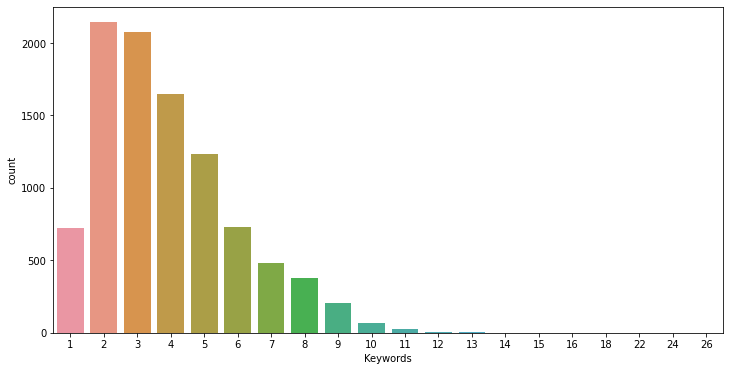

In [ ]:
plt.rcParams['figure.figsize'] = 12,6
sns.countplot(x='Keywords', data= ps_df)

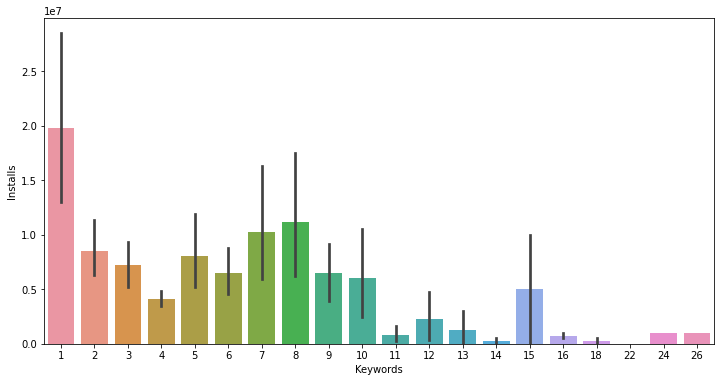

In [ ]:
plt.rcParams['figure.figsize'] = 12,6
sns.barplot(x='Keywords', y='Installs', data= ps_df)



---



**2) Top App Cateories based on their Ratings**


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 <a list of 33 Text major ticklabel objects>)

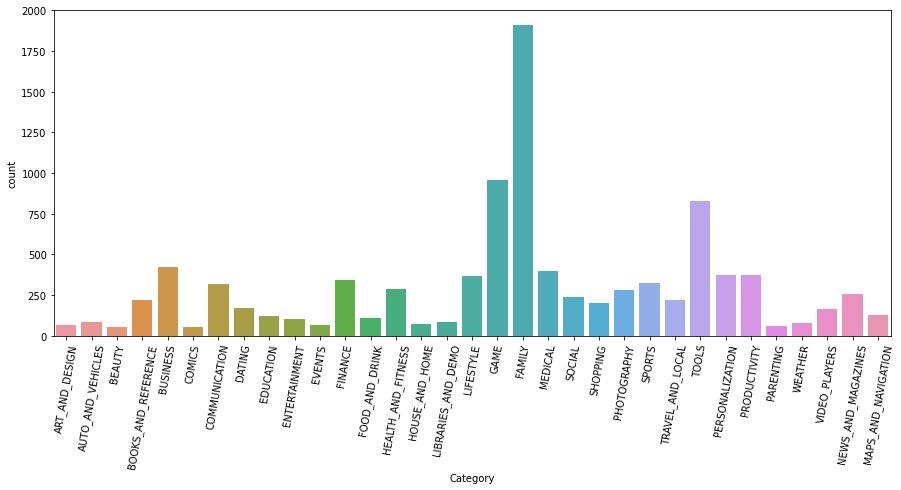

In [ ]:
# Categories Count
plt.rcParams['figure.figsize'] = 15,6
sns.countplot(x='Category',data = ps_df)
plt.xticks(rotation=80)

In [ ]:
# Category on rating basis
cat_df = ps_df.where(ps_df['Reviews']>500).groupby('Category',as_index = True)['Rating'].median().sort_values( ascending = False).reset_index()
cat_df.head()

,Category,Rating
0,BOOKS_AND_REFERENCE,4.5
1,HEALTH_AND_FITNESS,4.5
2,WEATHER,4.4
3,PARENTING,4.4
4,AUTO_AND_VEHICLES,4.4


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 <a list of 33 Text major ticklabel objects>)

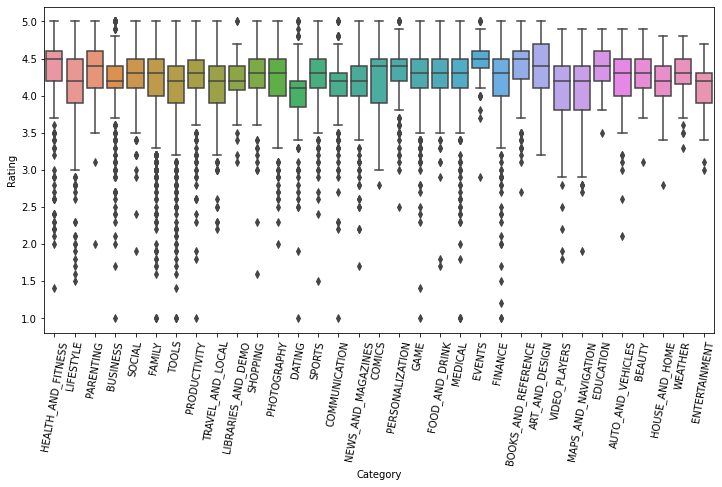

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(y='Rating',x='Category',data = ps_df.sort_values('Rating',ascending=False))
plt.xticks(rotation=80)



---



**Effect of Size on Installs**

(array([3.89397191e+10, 1.54498590e+10, 4.36592583e+09, 5.56333802e+09,
        2.61929490e+09, 3.49184547e+09, 3.08411940e+09, 3.34195907e+09,
        7.58154180e+08, 2.32442362e+09]),
 array([8.500000e+00, 1.000765e+04, 2.000680e+04, 3.000595e+04,
        4.000510e+04, 5.000425e+04, 6.000340e+04, 7.000255e+04,
        8.000170e+04, 9.000085e+04, 1.000000e+05]),
 <a list of 10 Patch objects>)

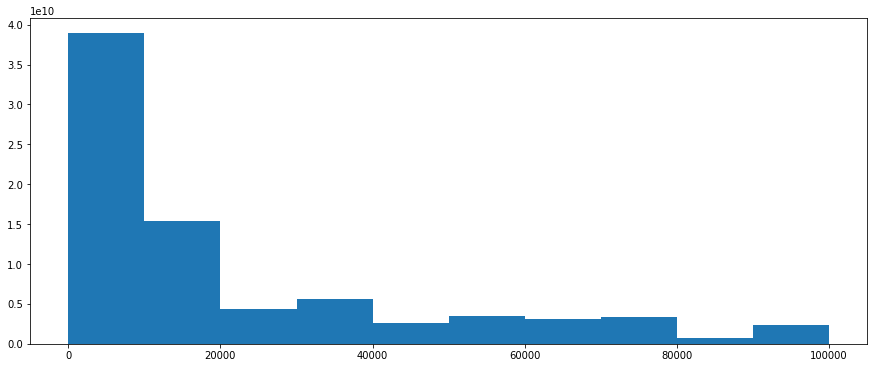

In [ ]:
from matplotlib.pyplot import hist
hist(ps_df.Size, weights=ps_df.Installs)

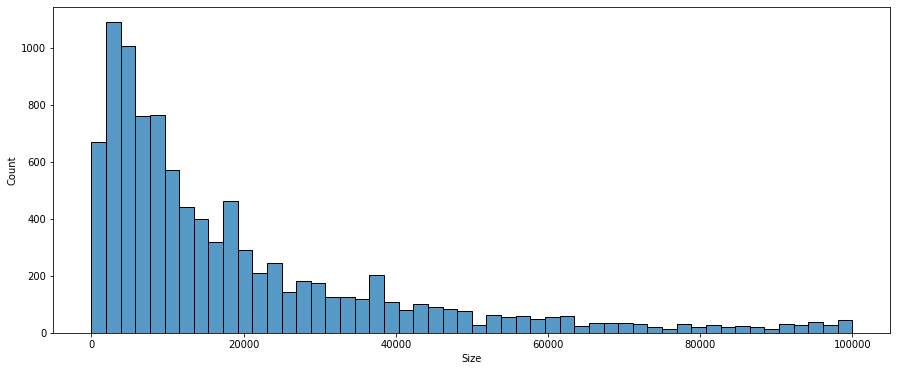

In [ ]:
sns.histplot(x='Size', data = ps_df)



---



**Price on Installs**

In [ ]:
paid_df = ps_df[ps_df['Type']== 'Paid']

(array([5.764476e+07, 2.010000e+03, 1.100000e+01, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 1.000000e+04,
        0.000000e+00, 2.091000e+05]),
 array([  0.99 ,  40.891,  80.792, 120.693, 160.594, 200.495, 240.396,
        280.297, 320.198, 360.099, 400.   ]),
 <a list of 10 Patch objects>)

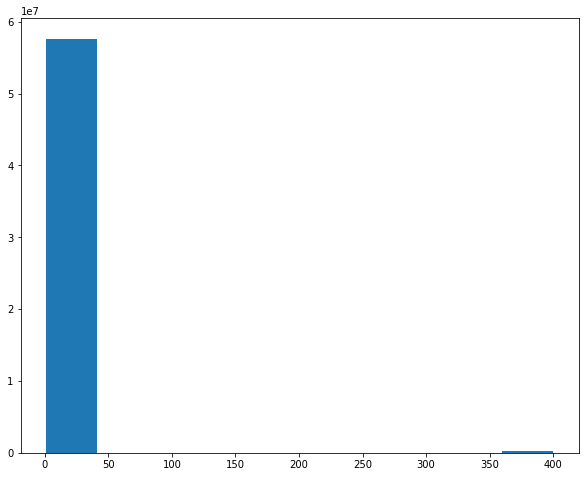

In [ ]:
plt.rcParams['figure.figsize'] = 10,8
hist(paid_df.Price, weights= paid_df.Installs)

In [ ]:
paid_df[paid_df.Price >45].head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Keywords
2253,Vargo Anesthesia Mega App,MEDICAL,4.6,92,32000.0,1000,Paid,79.99,Everyone,Medical,2018-06-18,19.0,4.0.3 and up,4
2390,Language Therapy: Aphasia,MEDICAL,4.3,10,28000.0,1000,Paid,74.99,Everyone,Medical,2018-06-25,3.1.1,4.0.3 and up,3
4197,most expensive app (H),FAMILY,4.3,6,1500.0,100,Paid,399.99,Everyone,Entertainment,2018-07-16,1.0,7.0 and up,4
4362,💎 I'm rich,LIFESTYLE,3.8,718,26000.0,10000,Paid,399.99,Everyone,Lifestyle,2018-03-11,1.0.0,4.4 and up,3
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7300.0,10000,Paid,400.00,Everyone,Lifestyle,2018-05-03,1.0.1,4.1 and up,5




---



Content Rating Installs

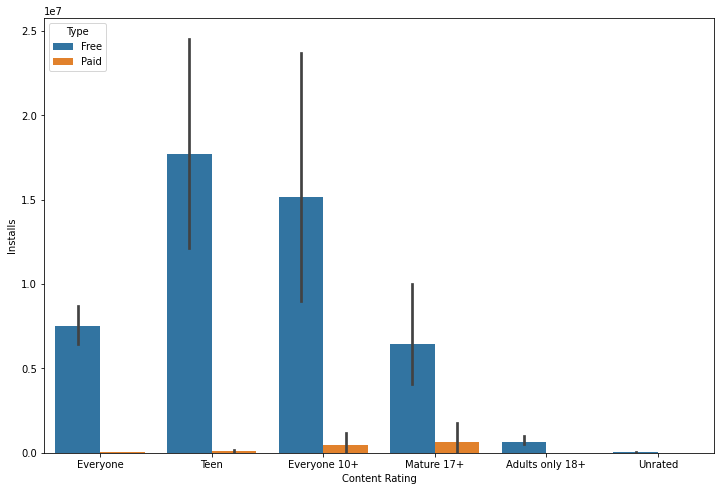

In [ ]:
plt.figure(figsize=(12,8))
sns.barplot(x="Content Rating", y="Installs", hue="Type", data=ps_df)

Content Rating Vs Rating

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

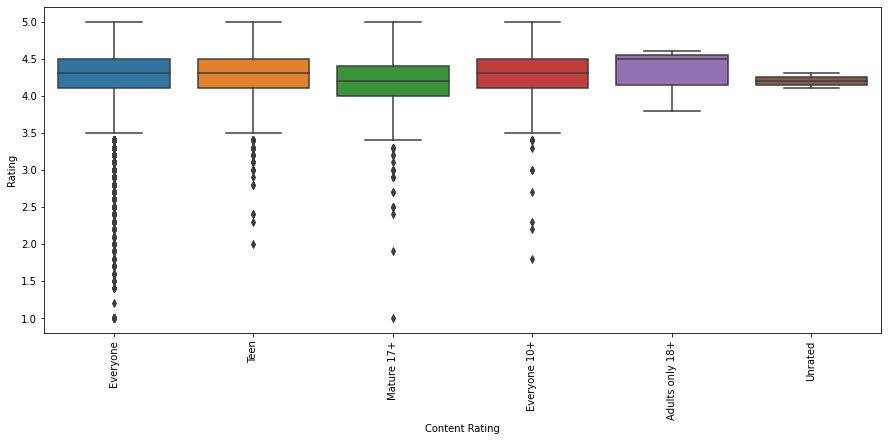

In [ ]:
plt.figure(figsize=(15,6))
sns.boxplot(y='Rating',x='Content Rating',data = ps_df.sort_values('Rating',ascending=False))
plt.xticks(rotation=90)



---



Type Column Analyze

Text(0.5, 1.0, 'Distribution of App Types')

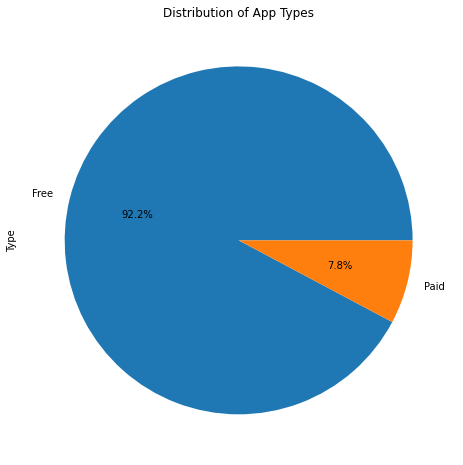

In [ ]:
app_type_plot = ps_df['Type'].value_counts().plot (kind = 'pie',autopct='%1.1f%%')
app_type_plot.set_title("Distribution of App Types")

**App Types and their respective median rating**

In [ ]:
ps_df[['Type','Rating']].where(ps_df['Reviews']>100).groupby('Type',as_index = True)['Rating'].median().sort_values( ascending = False).reset_index()

,Type,Rating
0,Paid,4.4
1,Free,4.3


**Genres distribution in the dataset**

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118]), <a list of 119 Text major ticklabel objects>)

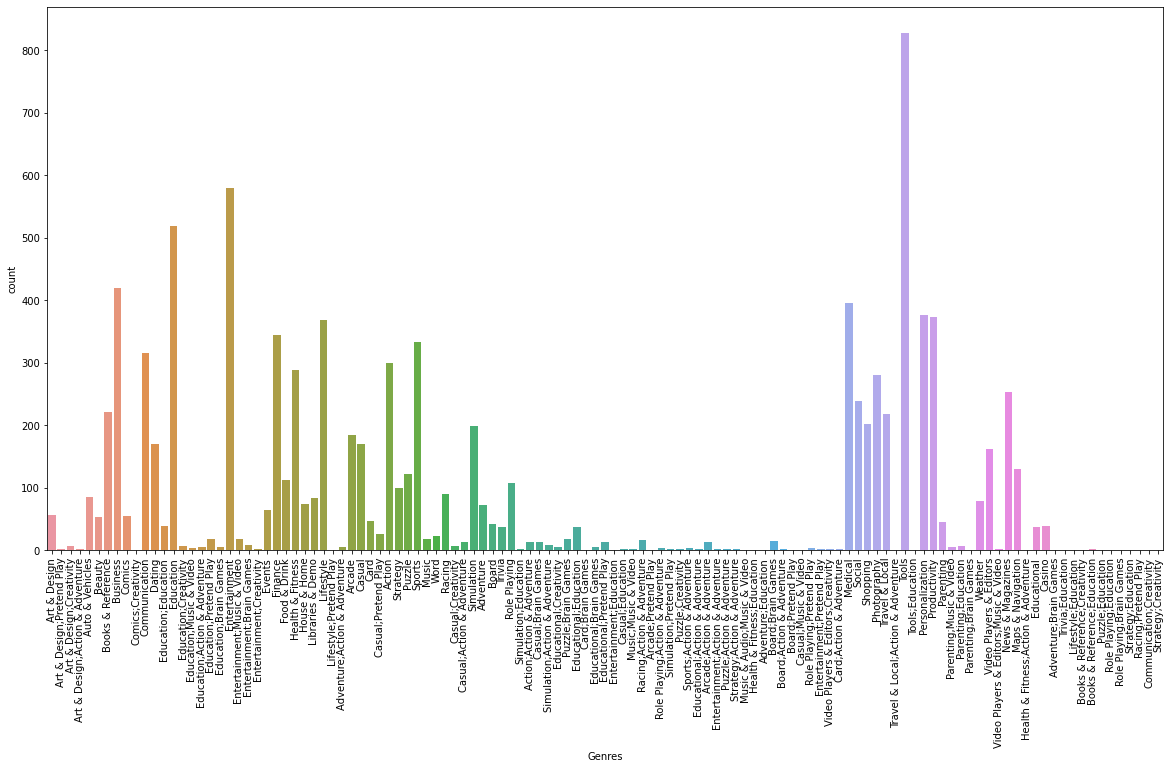

In [ ]:
plt.rcParams['figure.figsize'] = (20, 10)
sns.countplot(x='Genres',data=ps_df)
plt.xticks(rotation=90)

**CATEGORY COLUMN**

In [ ]:
# Checking on counts of each category in 'Category' column
ps_df['Category'].value_counts()

FAMILY                 1909
GAME                    960
TOOLS                   829
BUSINESS                420
MEDICAL                 396
PERSONALIZATION         376
PRODUCTIVITY            374
LIFESTYLE               369
FINANCE                 345
SPORTS                  327
COMMUNICATION           316
HEALTH_AND_FITNESS      288
PHOTOGRAPHY             281
NEWS_AND_MAGAZINES      254
SOCIAL                  239
BOOKS_AND_REFERENCE     222
TRAVEL_AND_LOCAL        219
SHOPPING                202
DATING                  171
VIDEO_PLAYERS           164
MAPS_AND_NAVIGATION     131
EDUCATION               119
FOOD_AND_DRINK          112
ENTERTAINMENT           102
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       84
WEATHER                  79
HOUSE_AND_HOME           74
EVENTS                   64
ART_AND_DESIGN           64
PARENTING                60
COMICS                   56
BEAUTY                   53
Name: Category, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 <a list of 33 Text major ticklabel objects>)

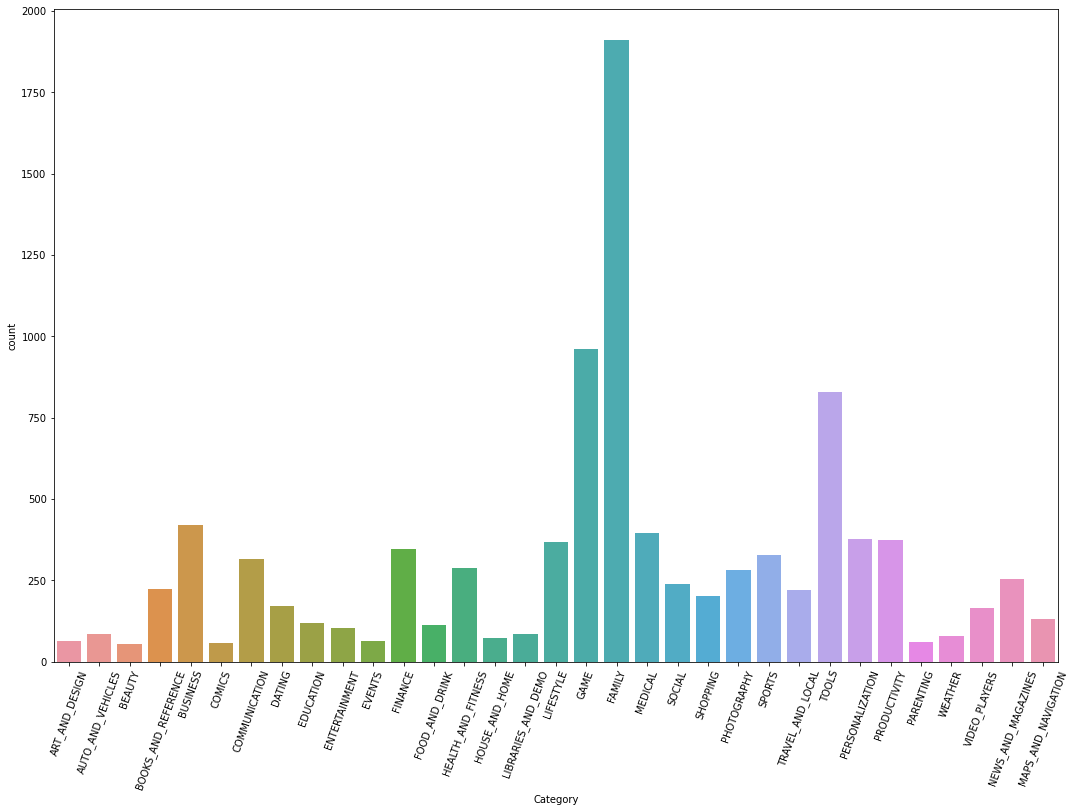

In [ ]:
plt.rcParams['figure.figsize'] = (18, 12)
sns.countplot(x='Category',data=ps_df)
plt.xticks(rotation=70)

In [ ]:
# Top App Category based on their Ratings
ps_df[['App','Category','Reviews', 'Rating']].where(ps_df['Reviews']>100).groupby('Category',as_index = True)['Rating'].mean().sort_values( ascending = False).head(10).reset_index()

,Category,Rating
0,BOOKS_AND_REFERENCE,4.414754
1,EDUCATION,4.361207
2,ART_AND_DESIGN,4.359615
3,EVENTS,4.346154
4,BEAUTY,4.343750
5,PARENTING,4.321951
6,AUTO_AND_VEHICLES,4.312727
7,PERSONALIZATION,4.312264
8,HEALTH_AND_FITNESS,4.301493
9,SOCIAL,4.286335


**2) Top App Genres based on their Ratings**

In [ ]:
ps_df[['App','Genres','Reviews', 'Rating']].where(ps_df['Reviews']>100).groupby('Genres',as_index = True)['Rating'].mean().sort_values( ascending = False).head(10).reset_index()

,Genres,Rating
0,Comics;Creativity,4.800000
1,Health & Fitness;Education,4.700000
2,Books & Reference;Education,4.700000
3,Strategy;Action & Adventure,4.600000
4,Adventure;Brain Games,4.600000
5,Puzzle;Education,4.600000
6,Entertainment;Creativity,4.533333
7,Music;Music & Video,4.533333
8,Racing;Pretend Play,4.500000
9,Strategy;Education,4.500000


**Top Apps based on installation**

In [ ]:
ps_df[['App','Installs']].sort_values(by = 'Installs', ascending= False).head()

,App,Installs
865,Google Play Games,1000000000
391,Skype - free IM & video calls,1000000000
3687,Google Play Movies & TV,1000000000
341,Hangouts,1000000000
3665,YouTube,1000000000


In [ ]:
ps_df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver', 'Keywords'],
      dtype='object')

**Genres vs Rating**

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118]), <a list of 119 Text major ticklabel objects>)

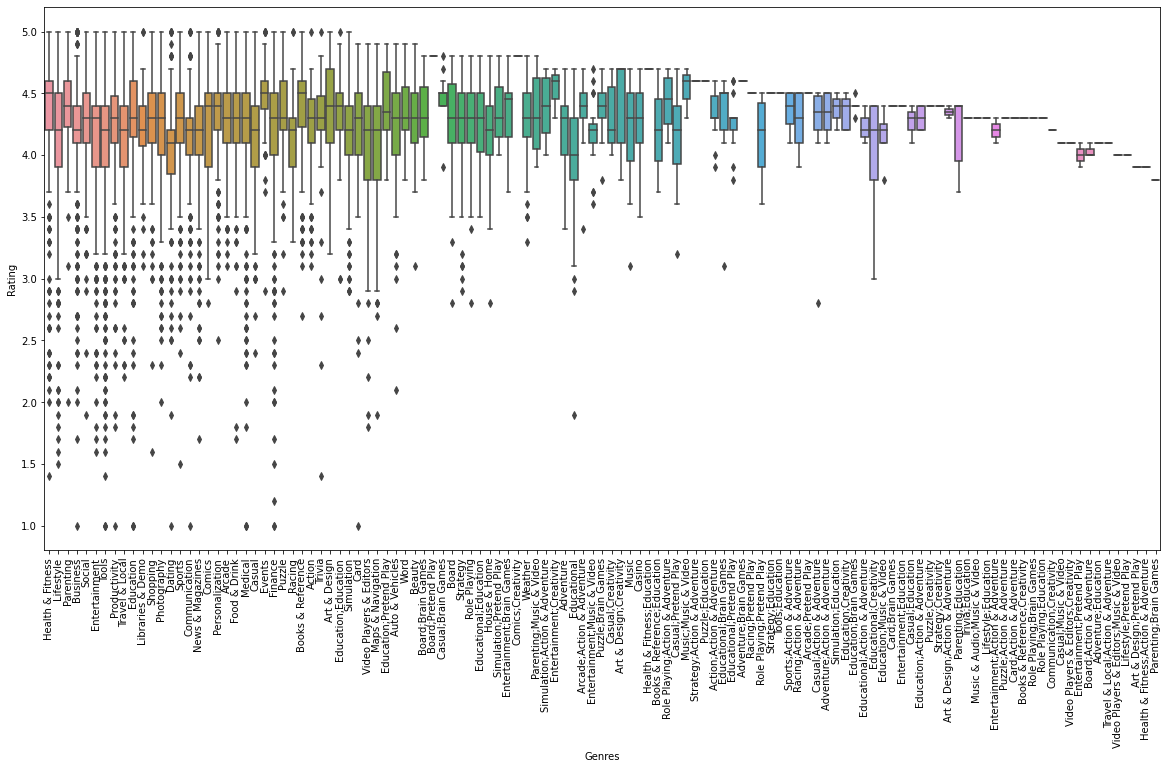

In [ ]:
plt.figure(figsize=(20,10))
sns.boxplot(y='Rating',x='Genres',data = ps_df.sort_values('Rating',ascending=False))
plt.xticks(rotation=90)

**Android Version Distribution in Dataset**

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 <a list of 33 Text major ticklabel objects>)

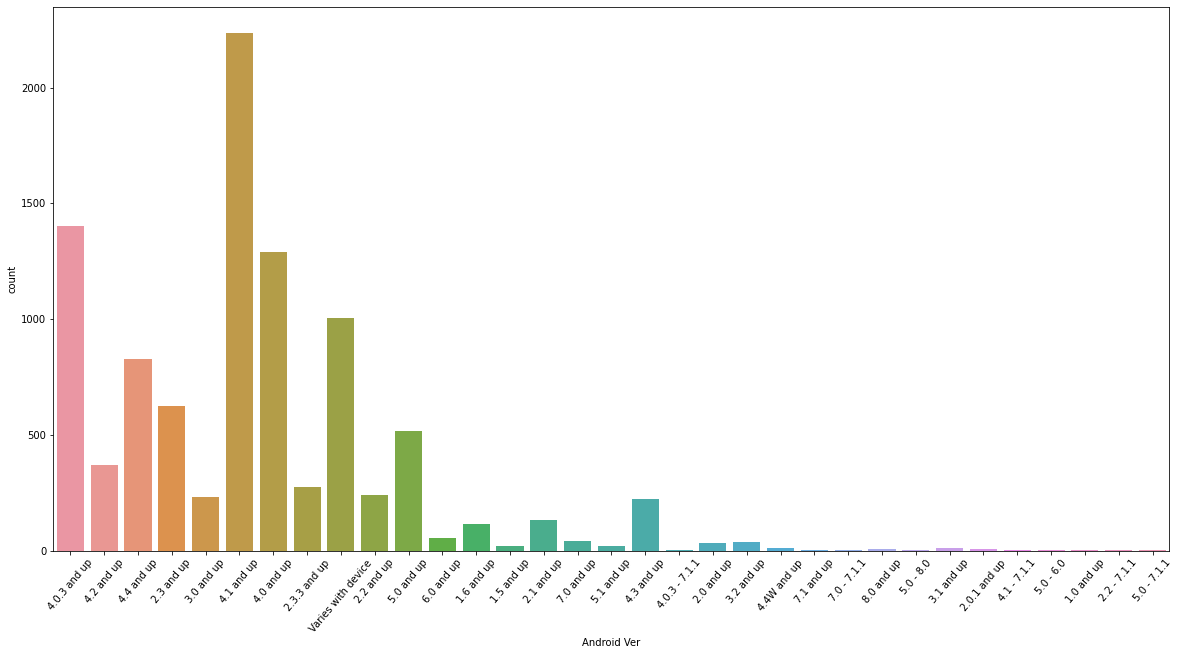

In [ ]:
plt.rcParams['figure.figsize'] = (20, 10)
sns.countplot(x='Android Ver',data=ps_df)
plt.xticks(rotation=50)



---



# **SECOND DATA SET - USER REVIEW**

**DATA EXPLORATION**

In [ ]:
ur_df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [ ]:
ur_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


## **DATA CLEANING OF USER REVIEW DATASET**

In [ ]:
ur_df.isnull().sum()

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64

In [ ]:
ur_df[ur_df['Translated_Review'].isnull()== True]

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
2,10 Best Foods for You,NaN,NaN,NaN,NaN
7,10 Best Foods for You,NaN,NaN,NaN,NaN
15,10 Best Foods for You,NaN,NaN,NaN,NaN
102,10 Best Foods for You,NaN,NaN,NaN,NaN
107,10 Best Foods for You,NaN,NaN,NaN,NaN
...,...,...,...,...,...
64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


In [ ]:
ur_df=ur_df.drop(ur_df[ur_df['Translated_Review'].isnull()== True].index.to_list())

In [ ]:
ur_df.shape

(37427, 5)

## **DATA ANALYZATION ON USER REVIEW DATASET**

In [ ]:
ur_df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
5,10 Best Foods for You,Best way,Positive,1.00,0.300000


In [ ]:
ur_df['App'].value_counts().sort_values(ascending = False).reset_index().head(20)

,index,App
0,Bowmasters,312
1,Helix Jump,273
2,Angry Birds Classic,273
3,Calorie Counter - MyFitnessPal,254
4,Candy Crush Saga,240
5,Duolingo: Learn Languages Free,240
6,Garena Free Fire,222
7,8 Ball Pool,219
8,Calorie Counter - Macros,200
9,10 Best Foods for You,194


In [ ]:
app_df = ur_df['App'].value_counts().sort_values(ascending = False).head(20).reset_index()

Text(0.5, 1.0, 'Distribution of Sentiments across apps')

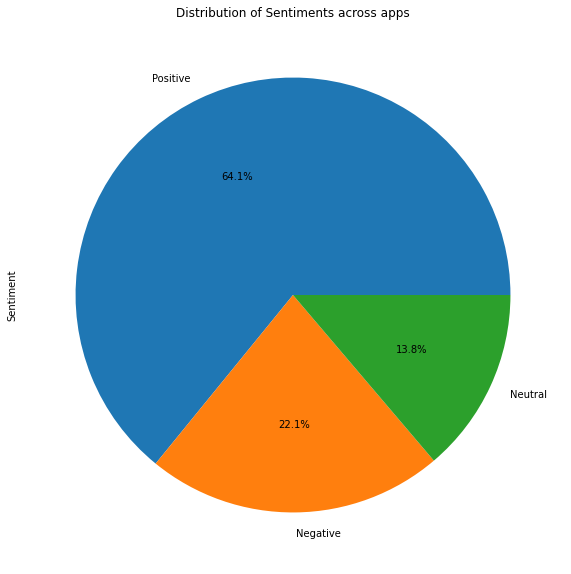

In [ ]:
app_plot = ur_df['Sentiment'].value_counts().plot (kind = 'pie',autopct='%1.1f%%')
app_plot.set_title("Distribution of Sentiments across apps")